# First steps with sen2chain

This notebook shows some basic features of the sen2chain package.

## Downloading and processing of Sentinel-2 imagery

### Check for images in a region of interest in a time period

Get a list of images in a time period from the Copernicus server. The region of interest can be defined with:
* a list of Sentinel-2 tiles names
* a bounding box
* a polygons file

In [1]:
from sen2chain import DataRequest

In [2]:
# Your request will cover january 2019
request = DataRequest("2019-01-01", "2019-01-31")

#### From Sentinel-2 tiles names

In [63]:
req = request.from_tiles(["40KCB"])

INFO:sen2chain.data_request:Requesting images ranging from 2019-01-01 00:00:00 to 2019-01-31 00:00:00


Sentinel2 tiles:
 ['40KCB']


INFO:sentinelsat.SentinelAPI:Found 5 products



From hubs
['S2A_MSIL1C_20190102T063501_N0207_R134_T40KCB_20190102T075059',
 'S2B_MSIL1C_20190107T063509_N0207_R134_T40KCB_20190107T075827',
 'S2A_MSIL1C_20190112T063511_N0207_R134_T40KCB_20190112T072902',
 'S2B_MSIL1C_20190117T063509_N0207_R134_T40KCB_20190117T075835',
 'S2B_MSIL1C_20190127T063509_N0207_R134_T40KCB_20190127T085141']


#### From a bounding box

In [ ]:
req = request.from_bbox(55.655364990234375, -21.282976338263616, 55.76522827148437, -21.185692243796023)

#### From a geojson, geopackage or shapefile

In [ ]:
req = request.from_file("roi.geojson")

### Download and process the images

In [64]:
from sen2chain import DownloadAndProcess

The images can be downloaded in parallel from the Scihub and PEPS servers. The number of concurrent downloads can't exceed 2 and 3 on Scihub and PEPS respectively.

In [ ]:
DownloadAndProcess(identifiers=req, 
                   hubs_limit={"scihub": 2, "peps": 2})

The images can also be processed as soon as they are downloaded.

In [ ]:
DownloadAndProcess(identifiers=req, 
                   process_products=True, 
                   indices_list=["NDVI", "NDWI"], 
                   nodata_clouds= True,
                   quicklook=True)

## Manage your local Sentinel-2 images library

Downloaded images can be found in *~/sen2chain_data/data* (can be changed in the configuration file). Products are stored in 3 directories (L1C, L2A, INDICES). Each one contains subdirectories corresponding to Sentinel-2 tiles (e.g: 40KCB, 38KQV ...).

### L1C Products

In [4]:
from sen2chain import Tile

List available L1C products in your Sentinel-2 images library for a given tile.

In [5]:
t = Tile("40KCB")
t.l1c

[TileProduct(identifier='S2A_OPER_PRD_MSIL1C_PDMC_20160408T042900_R134_V20160407T063507_20160407T063507.SAFE', date=datetime.datetime(2016, 4, 7, 6, 35, 7), cloud_cover=0.11232499999999998),
 TileProduct(identifier='S2A_MSIL1C_20180904T063511_N0206_R134_T40KCB_20180904T090928.SAFE', date=datetime.datetime(2018, 9, 4, 6, 35, 11), cloud_cover=28.3281),
 TileProduct(identifier='S2B_MSIL1C_20181208T063509_N0207_R134_T40KCB_20181208T075610.SAFE', date=datetime.datetime(2018, 12, 8, 6, 35, 9), cloud_cover=13.4455),
 TileProduct(identifier='S2B_MSIL1C_20190107T063509_N0207_R134_T40KCB_20190107T075827.SAFE', date=datetime.datetime(2019, 1, 7, 6, 35, 9), cloud_cover=80.6855),
 TileProduct(identifier='S2A_OPER_PRD_MSIL1C_PDMC_20170505T161637_R134_V20151129T063512_20151129T063512.SAFE', date=datetime.datetime(2015, 11, 29, 6, 35, 12), cloud_cover=6.434754264274703),
 TileProduct(identifier='S2A_OPER_PRD_MSIL1C_PDMC_20161212T050749_R134_V20151020T063512_20151020T063512.SAFE', date=datetime.datetim

Products metadata can be accessed easily.

In [8]:
from sen2chain import L1cProduct

In [9]:
l1c = L1cProduct("S2B_MSIL1C_20181208T063509_N0207_R134_T40KCB_20181208T075610")

In [10]:
l1c.sensing_orbit_number

'134'

In [11]:
l1c.footprint

'-21.738682979502528 55.93780715160759 -21.737965562026048 55.93797840184317 -21.73778270301896 55.93716947897659 -21.737713442220304 55.93718603138552 -21.688867488943096 55.72264367274322 -21.6894543770672 55.72250248760468 -21.635501822434584 55.482907116129134 -21.63537315722443 55.482938295322285 -21.635335088864775 55.4827617195832 -21.634552506957053 55.482951359112725 -21.588712339538127 55.270465593591055 -21.5893810264826 55.270302513422784 -21.58932924694572 55.270062347626315 -21.58941850309274 55.270040591820894 -21.586578088448448 55.25646090253412 -21.5865502212564 55.2564677061773 -21.547274574147593 55.068678787522714 -20.788940834779012 55.07856563278819 -20.79251943706309 55.519045551627094 -20.826884027118048 55.677934032749214 -20.826343893834814 55.67806423923382 -20.82745305056154 55.682975853174874 -20.827795507242747 55.68455899511429 -20.82915221936102 55.6905620230134 -20.829165464123907 55.69055883412164 -20.84655459097352 55.767562088755646 -20.880276261320

In [12]:
import rasterio
from rasterio.plot import show

In [13]:
%matplotlib inline

In [26]:
b03 = rasterio.open(l1c.b03)

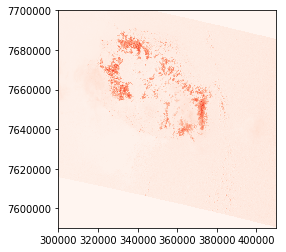

In [27]:
show(b03, cmap="Reds")

Process L1C products to L2A products using the Sen2Cor processor.

In [ ]:
l1c.process_l2a()

### L2A Products

In [16]:
t.l2a

[TileProduct(identifier='S2B_MSIL2A_20181208T063509_N0207_R134_T40KCB_20181208T075610.SAFE', date=datetime.datetime(2018, 12, 8, 6, 35, 9), cloud_cover=13.4455),
 TileProduct(identifier='S2B_MSIL2A_20190107T063509_N0207_R134_T40KCB_20190107T075827.SAFE', date=datetime.datetime(2019, 1, 7, 6, 35, 9), cloud_cover=80.6855)]

In [17]:
from sen2chain import L2aProduct

In [18]:
l2a = L2aProduct("S2A_MSIL2A_20161003T070232_N0204_R120_T38KQB_20161003T070230")

In [19]:
l2a.footprint

[(46.92105024324047, -20.788945135565847),
 (47.975035440872404, -20.773909033307064),
 (47.99502963950661, -21.764638706882494),
 (46.93397464729606, -21.780461682364),
 (46.92105024324047, -20.788945135565847)]

#### Process radiometric indices from the L2A products

List the available indices.

In [63]:
from sen2chain.indices import IndicesCollection

In [65]:
IndicesCollection.list

['NDVI', 'NDWIGAO', 'NDWIMCF']

In [55]:
l2a.process_indices(["NDVI"])

INFO:sen2chain.products:S2A_MSIL2A_20161003T070232_N0204_R120_T38KQB_20161003T070230: processing_indices
INFO:sen2chain.products:Processing NDVI: S2A_MSIL2A_20161003T070232_N0204_R120_T38KQB_20161003T070230
INFO:sen2chain.indices_functions:creating raw NDVI (tiff - int16)
INFO:sen2chain.indices_functions:converting raw indice to JPEG2000


## Radiometric indices

Indices products are computed from L2A Sentinel-2 products and are of three types:
* **raw**: the indice raster file, stricly speaking ;
* **cloud masked**: the indice with clouds as nodata (using the Sen2Cor clouds mask) ;
* **quicklook**: the indice quicklook (8 bit images).

In [21]:
t = Tile("38KQB")

In [22]:
t.ndvi.raws

[TileProduct(identifier='S2A_MSIL2A_20161003T070232_N0204_R120_T38KQB_20161003T070230_NDVI.jp2', date=datetime.datetime(2016, 10, 3, 7, 2, 32), cloud_cover=8.7407)]

In [24]:
t.ndvi.masks

[]

In [25]:
t.ndvi.quicklooks

[TileProduct(identifier='S2A_MSIL2A_20161003T070232_N0204_R120_T38KQB_20161003T070230_NDVI_QUICKLOOK.tif', date=datetime.datetime(2016, 10, 3, 7, 2, 32), cloud_cover=8.7407)]

In [45]:
# This is the current way for accessing NDVI products path.
# It shouldbe more straightforward in the next release of sen2chain.
ndvi_path = t.paths["indices"]["ndvi"] / "S2A_MSIL2A_20161003T070232_N0204_R120_T38KQB_20161003T070230" / "S2A_MSIL2A_20161003T070232_N0204_R120_T38KQB_20161003T070230_NDVI.tif"

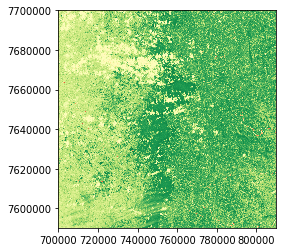

In [48]:
ndvi = rasterio.open(ndvi_path)
show(ndvi, cmap="RdYlGn")

## Time series

Time series analysis can be conducted on your library radiometric indices products.

In [4]:
from sen2chain import TimeSeries

In [ ]:
ts = TimeSeries(vectors_file="polygons.geojson",
                indices=["NDVI"],
                date_min="2018-01-01",
                date_max="2018-01-31",
                cover_max=80)

## Automatization: downloading and processing

The whole process of downloading and processing Sentinel-2 imagery in a given ROI can be fully automatized. The tiles to watch must be registered in *~/sen2chain_data/config/tiles_to_watch.csv*

### Tiles to watch

This dataframe contains the tiles that will be checked each time the automatization is run.
* **tile**: Name of the Sentinel-2 tile.
* **start_date**: When a new tile is added, sen2chain will download all the available images for this tile. To avoid this behaviour, a start_date can be provided, so that only the images after this date will be downloaded.
* **last_date**: Date of the most recent image for this tile in the library (updated by sen2chain).
* **ignore**: Ignore this tile or not.
* **tags**: Words that describe the tiles. Can be used to upload only some tiles.

In [49]:
import pandas as pd

In [53]:
pd.read_csv("~/sen2chain_data/config/tiles_to_watch.csv")

tile  start_date   last_date ignore                   tags
0  40KCB  2018-09-15  2018-12-12    NaN                reunion
1  38KQV         NaN  2018-05-30      *  madagascar, s2malaria
2  38KQB         NaN  2018-05-30      *  madagascar, s2malaria

### Run the automatization

In [2]:
from sen2chain import Automatization

In [ ]:
auto = Automatization()
auto.run()

You can schedule the scanning of the tiles with a cron job on a regular basis.